# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 636


In [4]:
cities

['agat village',
 'khammam',
 'hadibu',
 'udachny',
 'adamstown',
 'yellowknife',
 'tarawa',
 'cuyo',
 'olonkinbyen',
 'waitangi',
 'jamestown',
 'edinburgh of the seven seas',
 'crane',
 'punta arenas',
 'lucapa',
 'labasa',
 "'ohonua",
 'georgetown',
 'senanga',
 'tara',
 'lebu',
 'grytviken',
 'umm kaddadah',
 'callao',
 'college',
 'hawaiian paradise park',
 'gizo',
 'laguna',
 'ushuaia',
 'koungou',
 'vorgashor',
 'port-vila',
 'goz beida',
 'lihue',
 'hargeysa',
 'vila franca do campo',
 'totskoye',
 'san patricio',
 'longyearbyen',
 'bam',
 'anguera',
 'port mathurin',
 'fortuna',
 'blackmans bay',
 'saipan',
 'kismayo',
 'kotabumi',
 'albany',
 'nemuro',
 'saint-pierre',
 'howard springs',
 'manokwari',
 "st. john's",
 'invercargill',
 'hasaki',
 'remire-montjoly',
 'bredasdorp',
 'margaret river',
 'hassi messaoud',
 'aasiaat',
 'port-aux-francais',
 'codrington',
 'fitchburg',
 'prince albert',
 'carnarvon',
 'papatowai',
 'temiskaming shores',
 'bria',
 'san fernando de apur

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city      
    
    city_url = url + "&q=" + city
    #print(city_url)
    
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | agat village
Processing Record 2 of Set 1 | khammam
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | tarawa
Processing Record 8 of Set 1 | cuyo
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | crane
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | lucapa
Processing Record 16 of Set 1 | labasa
Processing Record 17 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | senanga
Processing Record 20 of Set 1 | tara
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | grytviken
Processi

Processing Record 42 of Set 4 | hayma'
City not found. Skipping...
Processing Record 43 of Set 4 | saacow
Processing Record 44 of Set 4 | chui
Processing Record 45 of Set 4 | kailua-kona
Processing Record 46 of Set 4 | praia da vitoria
Processing Record 47 of Set 4 | puerto natales
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | dar kulayb
Processing Record 0 of Set 5 | suntar
Processing Record 1 of Set 5 | oroqen zizhiqi
Processing Record 2 of Set 5 | calbuco
Processing Record 3 of Set 5 | patterson
Processing Record 4 of Set 5 | la'ie
Processing Record 5 of Set 5 | sitangkai
Processing Record 6 of Set 5 | kuruman
Processing Record 7 of Set 5 | portland
Processing Record 8 of Set 5 | pangkalpinang
Processing Record 9 of Set 5 | bogotol
Processing Record 10 of Set 5 | aral
Processing Record 11 of Set 5 | sao joao da barra
Processing Record 12 of Set 5 | prince george
Processing Record 13 of Set 5 | kittila
Processing Record 14 of Set 5 | wainwright
Processi

Processing Record 36 of Set 8 | demre
Processing Record 37 of Set 8 | kerikeri
Processing Record 38 of Set 8 | kabansk
Processing Record 39 of Set 8 | safi
Processing Record 40 of Set 8 | ginir
Processing Record 41 of Set 8 | illizi
Processing Record 42 of Set 8 | kone
Processing Record 43 of Set 8 | es castell
Processing Record 44 of Set 8 | les cayes
Processing Record 45 of Set 8 | ouellah
City not found. Skipping...
Processing Record 46 of Set 8 | pemba
Processing Record 47 of Set 8 | aykhal
Processing Record 48 of Set 8 | sarina
Processing Record 49 of Set 8 | gwadar
Processing Record 0 of Set 9 | granja
Processing Record 1 of Set 9 | petauke
Processing Record 2 of Set 9 | vilyuysk
Processing Record 3 of Set 9 | pisco
Processing Record 4 of Set 9 | doka
Processing Record 5 of Set 9 | hoquiam
Processing Record 6 of Set 9 | diamantina
Processing Record 7 of Set 9 | amos
Processing Record 8 of Set 9 | nakano
Processing Record 9 of Set 9 | mejit
Processing Record 10 of Set 9 | tura
Pro

Processing Record 25 of Set 12 | keelung
Processing Record 26 of Set 12 | xining
Processing Record 27 of Set 12 | hotan
Processing Record 28 of Set 12 | ceylanpinar
Processing Record 29 of Set 12 | tangalle
Processing Record 30 of Set 12 | manuel ojinaga
City not found. Skipping...
Processing Record 31 of Set 12 | keetmanshoop
Processing Record 32 of Set 12 | campo maior
Processing Record 33 of Set 12 | palu
Processing Record 34 of Set 12 | aver-o-mar
Processing Record 35 of Set 12 | zyryanskoye
Processing Record 36 of Set 12 | gorontalo
Processing Record 37 of Set 12 | punta del este
Processing Record 38 of Set 12 | ondjiva
Processing Record 39 of Set 12 | bangassou
Processing Record 40 of Set 12 | swan hill
Processing Record 41 of Set 12 | deqen
Processing Record 42 of Set 12 | flying fish cove
Processing Record 43 of Set 12 | caxito
Processing Record 44 of Set 12 | aracati
Processing Record 45 of Set 12 | bayanhongor
Processing Record 46 of Set 12 | san carlos
Processing Record 47 o

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()





City          610
Lat           610
Lng           610
Max Temp      610
Humidity      610
Cloudiness    610
Wind Speed    610
Country       610
Date          610
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,agat village,13.3886,144.6585,27.52,90,75,5.14,GU,1682435253
1,khammam,17.2500,80.1500,29.47,58,93,2.88,IN,1682435253
2,hadibu,12.6500,54.0333,28.69,67,93,0.53,YE,1682435254
3,udachny,66.4167,112.4000,-7.10,94,100,4.78,RU,1682435254
4,adamstown,-25.0660,-130.1015,25.05,86,2,5.15,PN,1682435254


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agat village,13.3886,144.6585,27.52,90,75,5.14,GU,1682435253
1,khammam,17.2500,80.1500,29.47,58,93,2.88,IN,1682435253
2,hadibu,12.6500,54.0333,28.69,67,93,0.53,YE,1682435254
3,udachny,66.4167,112.4000,-7.10,94,100,4.78,RU,1682435254
4,adamstown,-25.0660,-130.1015,25.05,86,2,5.15,PN,1682435254


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

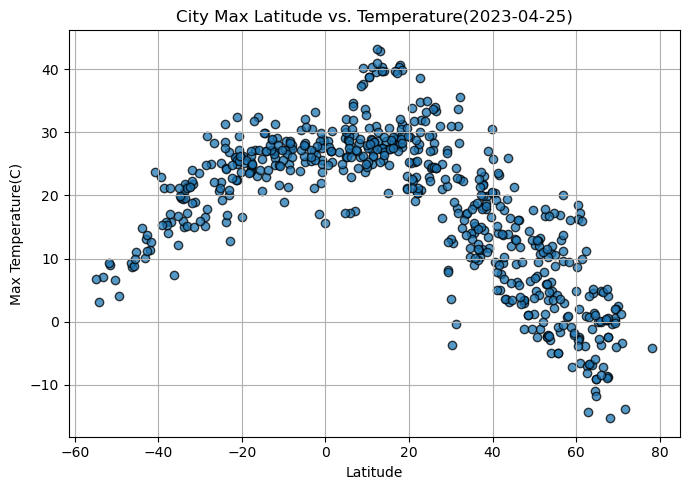

In [11]:
from datetime import datetime

# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (7,5))
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker= "o", edgecolor = "black",label = "Cities", alpha = 0.75)

# Incorporate the other graph properties
#plt.grid(True)
plt.title("City Max Latitude vs. Temperature" + "(" + str(datetime.now().date()) + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

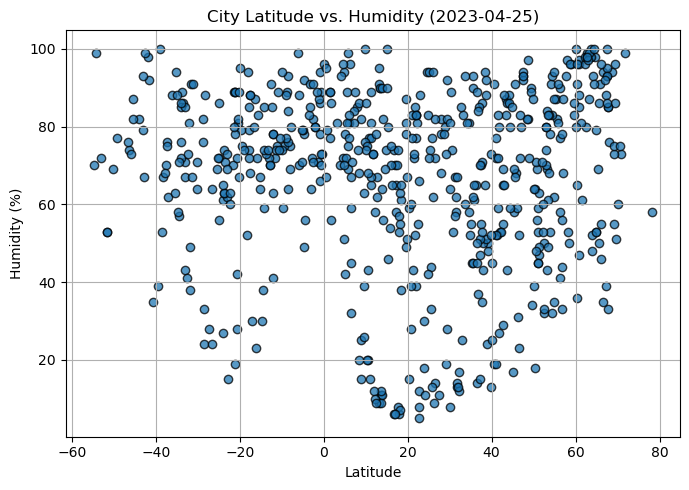

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (7,5))
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker= "o", edgecolor = "black", label = "Cities", alpha = 0.75, linewidth = 1, linestyle ="-")


# Incorporate the other graph properties
#plt.grid=True
plt.title("City Latitude vs. Humidity " + "(" + str(datetime.now().date()) + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

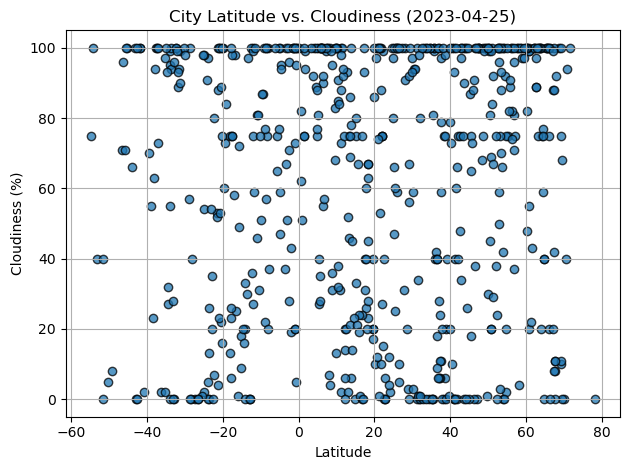

In [13]:
# Build the scatter plots for latitude vs. cloudiness
#plt.figure(figsize = (5,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker= "o", edgecolor = "black", label = "Cities", alpha = 0.75, linewidth = 1, linestyle ="-")


# Incorporate the other graph properties
#plt.grid(True)
plt.title("City Latitude vs. Cloudiness " + "(" + str(datetime.now().date()) + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

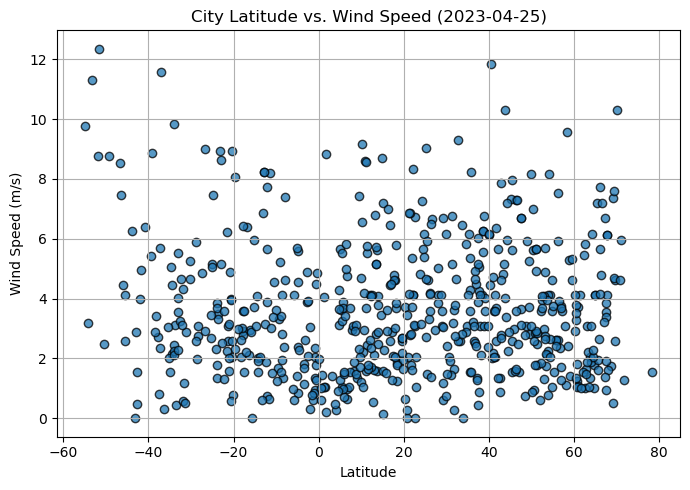

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (7,5))
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker= "o", edgecolor = "black", label = "Cities", alpha = 0.75, linewidth = 1, linestyle ="-")


# Incorporate the other graph properties
#plt.grid()
plt.title("City Latitude vs. Wind Speed " + "(" + str(datetime.now().date()) + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
#x_values = city_data_df["Lat"]
#y_values = city_data_df["Wind Speed"]

def linear_reg(x_values, y_values, coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #print(line_eq)
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-" )
    plt.annotate(line_eq, coords, fontsize= 15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()




In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agat village,13.3886,144.6585,27.52,90,75,5.14,GU,1682435253
1,khammam,17.2500,80.1500,29.47,58,93,2.88,IN,1682435253
2,hadibu,12.6500,54.0333,28.69,67,93,0.53,YE,1682435254
3,udachny,66.4167,112.4000,-7.10,94,100,4.78,RU,1682435254
5,yellowknife,62.4560,-114.3525,0.87,80,100,5.81,CA,1682435255


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,25.05,86,2,5.15,PN,1682435254
9,waitangi,-43.9535,-176.5597,14.90,82,66,6.26,NZ,1682435256
11,edinburgh of the seven seas,-37.0676,-12.3116,15.73,62,73,11.57,SH,1682435256
13,punta arenas,-53.1500,-70.9167,7.06,72,40,11.32,CL,1682435191
14,lucapa,-8.4192,20.7447,27.37,64,75,1.33,AO,1682435256


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8488834439606721


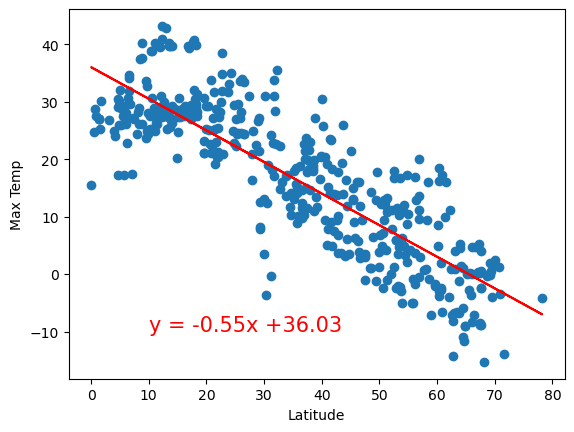

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
linear_reg(x_values, y_values, (10,-10))
#plt.annotate(line_eq, (10,5), fontsize= 15, color="red")


The r-value is: 0.7925582374707909


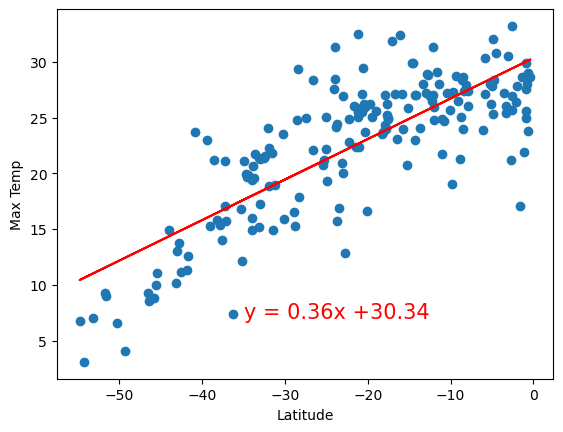

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
linear_reg(x_values, y_values, (-35, 7))

**Discussion about the linear relationship:** The Northen and Southern regression displays diffrent realationship between temperature and latitude. Northen regression diaplays negative relationship between temperature and latitude where as southern regression displays positive relationship between tempature and latitude. As you move away from the northern equator the max temperature decresses and as you move closer to the southern eqator, the max temperature increases. In northern hemisphere, as latitude increases the max temperature also increases. In Southern hemisphere, as latitude increases the max temperature also gradually increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1782714052209878


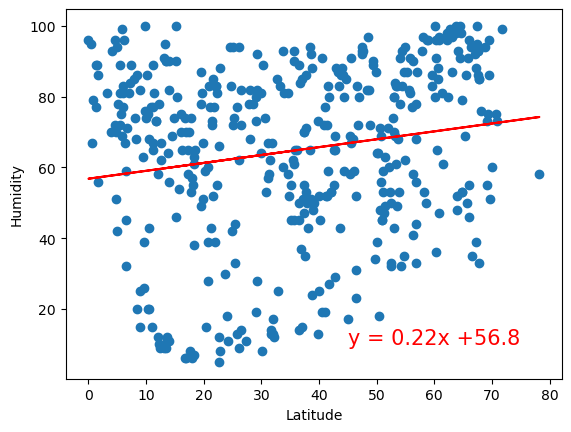

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
linear_reg(x_values, y_values, (45,10))


The r-value is: 0.09824716142217128


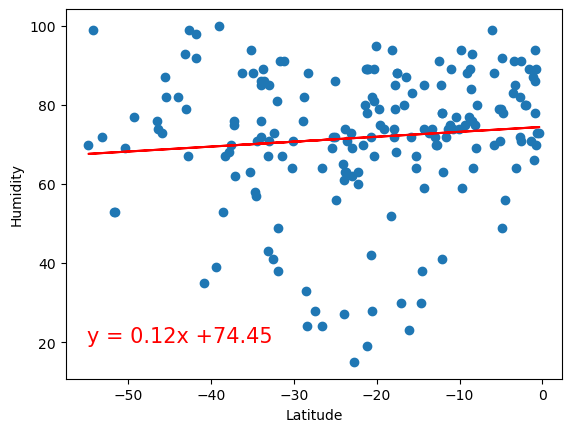

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
linear_reg(x_values, y_values, (-55,20))

**Discussion about the linear relationship:** Both Northern and southern linearregression shows mild positive relationship between humidity and latitude. There is no strong correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04543355005513686


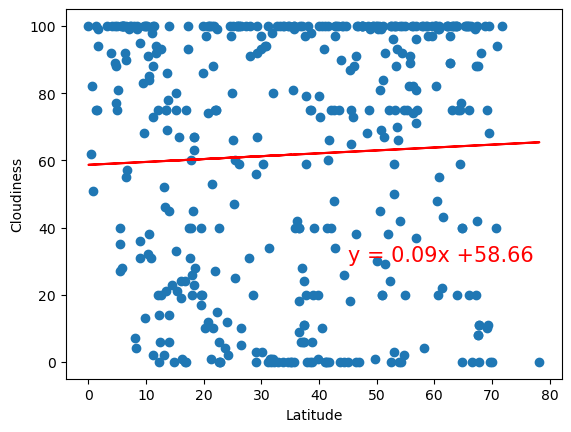

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
linear_reg(x_values, y_values, (45,30))


The r-value is: 0.05123465456928961


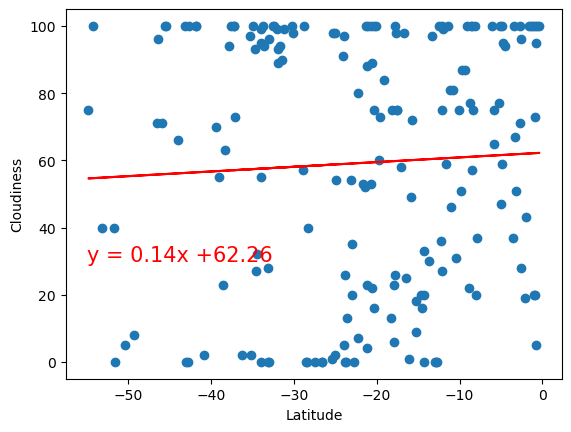

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
linear_reg(x_values, y_values, (-55,30))


**Discussion about the linear relationship:** Both Northern and Southern linear regression between latitude and cloudiness has not correlation. There is no strong relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06747859589937504


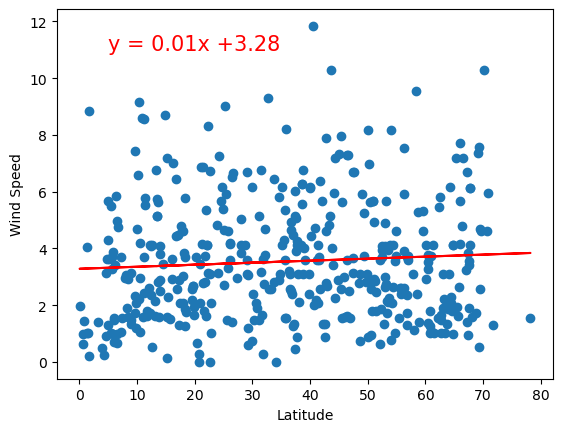

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_reg(x_values, y_values, (5,11))

The r-value is: -0.3113546755296538


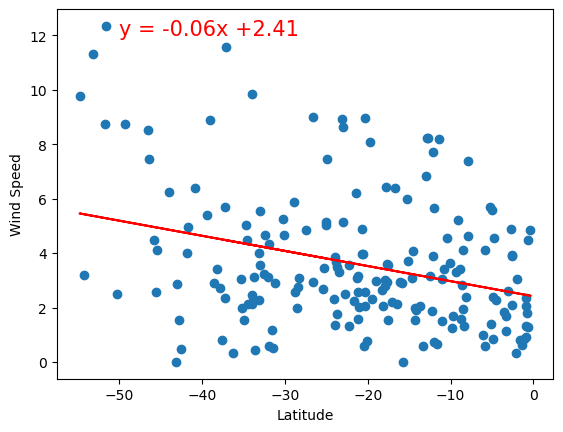

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_reg(x_values, y_values, (-50,12))

**Discussion about the linear relationship:** The scatter plot maps of Northern and Southern between the cities' wind speed and latitude show no strong corrrelation. 